In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_path = r"C:\Users\Admin\Downloads\train"
test_path = r"C:\Users\Admin\Downloads\test"

In [3]:
img_height,img_width=512,512
batch_size=32

In [4]:
train_dataset=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [5]:
test_dataset=ImageDataGenerator(rescale=1.0/255)

In [6]:
train_img=train_dataset.flow_from_directory(
    train_path,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 251 images belonging to 3 classes.


In [7]:
test_img=test_dataset.flow_from_directory(
    test_path,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 66 images belonging to 3 classes.


In [8]:
train_img.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [9]:
model=Sequential([
    Conv2D(64,(3,3),activation="relu",input_shape=(img_height,img_width,3)),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Conv2D(200,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(3,activation="softmax"),
])

In [10]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [11]:
history=model.fit(train_img,epochs=20,validation_data=test_img)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1086s 138s/step - accuracy: 0.3187 - loss: 5.9760 - val_accuracy: 0.4545 - val_loss: 1.0528
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1004s 121s/step - accuracy: 0.5310 - loss: 0.9608 - val_accuracy: 0.5455 - val_loss: 1.3267
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 982s 122s/step - accuracy: 0.6846 - loss: 0.6672 - val_accuracy: 0.5909 - val_loss: 1.3238
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 947s 115s/step - accuracy: 0.7128 - loss: 0.6921 - val_accuracy: 0.6364 - val_loss: 1.0571
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 980s 119s/step - accuracy: 0.6975 - loss: 0.6295 - val_accuracy: 0.5909 - val_loss: 1.1632
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 936s 115s/step - accuracy: 0.7681 - loss: 0.5694 - val_accuracy: 0.6212 - val_loss: 1.2265
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 937s 116s/step - accuracy: 0.7734 - loss: 0.5386 - val_accuracy: 0.6818 - val_loss: 1.2176
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 862s 106s/step - accuracy: 0.7852 - loss: 0.5062 - val_accuracy: 0.6061 -

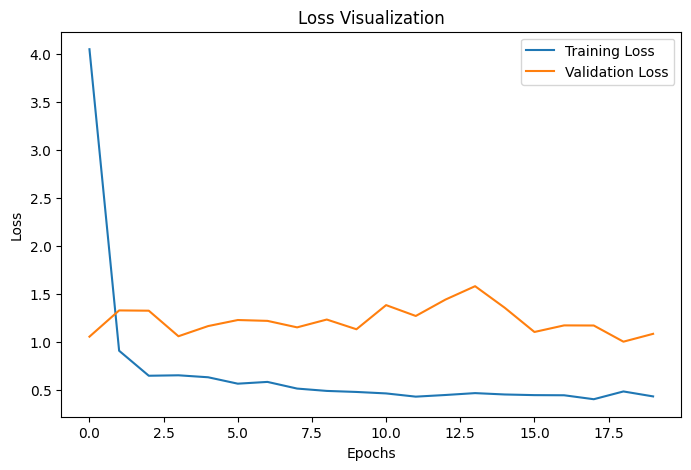

In [12]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

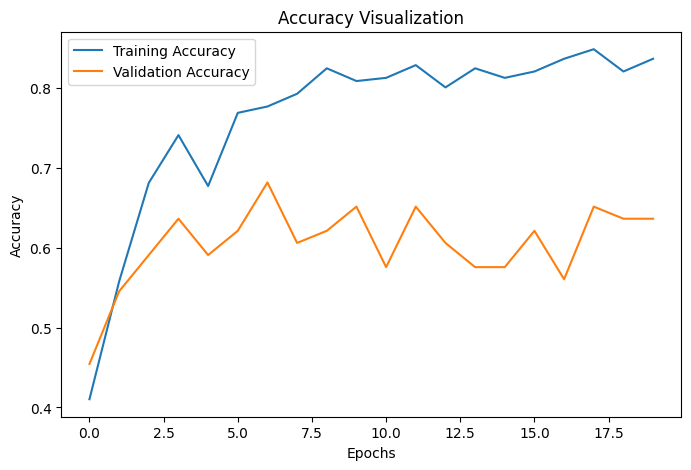

In [13]:
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [14]:
def image_prediction(path):
    img=load_img(path,target_size=(512,512))
    img_arr=img_to_array(img)
    img_arr_norm=img_arr/255.0
    img_flatten=np.expand_dims(img_arr_norm,axis=0)
    prediction=model.predict(img_flatten)[0]
    pred_class=classes[np.argmax(prediction)]
    return pred_class